<a href="https://colab.research.google.com/github/winstonlingga/QM2Gr13/blob/main/Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Impact of Oil Dependency on the Socio-Economic Development of Major Oil Exporters**



In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

1. Download Necessary Libraries and Upload Database Into a Data file
2. Use appropriate Data Imputation Techniques to Fill in Missing Data


In [ ]:
!mkdir data
!mkdir data/grproject

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Oil Exporting Country Data - COUNTRY DATA.csv to Oil Exporting Country Data - COUNTRY DATA.csv


In [ ]:
df = pd.read_csv('Oil Exporting Country Data - COUNTRY DATA.csv', skiprows = 2)

df.columns = ['Country', 'Year', 'GDP_per_Capita', 'Oil_Rent',
              'Debt_to_GDP_Ratio', 'HDI', 'Democracy_Index',
              'Civil_Rights_Freedom_Indexes', 'Gini_Coefficient']

In [ ]:
# Convert 'Year' to integer and other numerical columns to float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to numeric, making non-numeric values NaN
df.dropna(subset=['Year'], inplace=True)  # Drop rows where 'Year' is NaN
df['Year'] = df['Year'].astype(int)
df['GDP_per_Capita'] = pd.to_numeric(df['GDP_per_Capita'], errors='coerce')
df['Oil_Rent'] = pd.to_numeric(df['Oil_Rent'], errors='coerce')
df['Debt_to_GDP_Ratio'] = pd.to_numeric(df['Debt_to_GDP_Ratio'], errors='coerce')
df['HDI'] = pd.to_numeric(df['HDI'], errors='coerce')
df['Gini_Coefficient'] = pd.to_numeric(df['Gini_Coefficient'], errors='coerce')

# Drop completely empty rows if any
df.dropna(how='all', inplace=True)

In [ ]:
#Data Imputation
df['Gini_Coefficient'] = df['Gini_Coefficient'].interpolate(method='linear')
# Replace missing values with the mean or median of the column
df['GDP_per_Capita'].fillna(df['GDP_per_Capita'].mean(), inplace=True)
df['Oil_Rent'].fillna(df['Oil_Rent'].mean(), inplace=True)
df['Debt_to_GDP_Ratio'].fillna(df['Debt_to_GDP_Ratio'].median(), inplace=True)

In [ ]:
# Replace missing values with the mode (most frequent value)
# Assuming these are categorical or ordinal and have a common frequent value
df['Democracy_Index'].fillna(df['Democracy_Index'].mode()[0], inplace=True)
df['Civil_Rights_Freedom_Indexes'].fillna(df['Civil_Rights_Freedom_Indexes'].mode()[0], inplace=True)


In [ ]:
# Verify the changes
print(df.head())
print(df.isnull().sum())

        Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0  Saudi Arabia  2000      8795.26060  41.669171               87.2  0.737   
1  Saudi Arabia  2001      8337.32272  33.352663               93.7  0.744   
2  Saudi Arabia  2002      8380.95930  31.342448               96.9  0.750   
3  Saudi Arabia  2003      9321.80387  37.034522               82.0  0.760   
4  Saudi Arabia  2004     10935.01660  42.640930               65.0  0.770   

  Democracy_Index Civil_Rights_Freedom_Indexes  Gini_Coefficient  
0           09.08                         8.85               NaN  
1           09.08                         8.85               NaN  
2           09.08                         8.85               NaN  
3           09.08                         8.85               NaN  
4           09.08                         8.85               NaN  
Country                          0
Year                             0
GDP_per_Capita                   0
Oil_Rent                

In [ ]:
print(df)

          Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0    Saudi Arabia  2000      8795.26060  41.669171               87.2  0.737   
1    Saudi Arabia  2001      8337.32272  33.352663               93.7  0.744   
2    Saudi Arabia  2002      8380.95930  31.342448               96.9  0.750   
3    Saudi Arabia  2003      9321.80387  37.034522               82.0  0.760   
4    Saudi Arabia  2004     10935.01660  42.640930               65.0  0.770   
..            ...   ...             ...        ...                ...    ...   
126           UAE  2016     41054.53960  11.080756               19.4  0.870   
127           UAE  2017     43063.96750  13.498573               21.6  0.897   
128           UAE  2018     46722.26870  17.098994               20.9  0.909   
129           UAE  2019     45376.17080  15.681591               27.3  0.920   
130           UAE  2020     37629.17420  10.494098               36.9  0.912   

    Democracy_Index Civil_Rights_Freedo

As seen on the graph, the Gini Coefficienct for Saudi Arabia can not be interpolated as there is only one data point of reference, 2019. Thus this is a weakness.

In [ ]:
#Data Cleaning
df = df.replace(r'^\s*$', np.nan, regex=True) #replace the empty string or strings composed with whitespace charater np.nan
numeric_c = [col for col in df.columns if col != 'Country' and col != 'Year']
df[numeric_c] = df[numeric_c].apply(pd.to_numeric, errors='coerce') # change to numeric
df[numeric_c] = df[numeric_c].replace(' ', 'NaN', regex=True)

In [ ]:
print(df)

          Country  Year  GDP_per_Capita   Oil_Rent  Debt_to_GDP_Ratio    HDI  \
0    Saudi Arabia  2000      8795.26060  41.669171               87.2  0.737   
1    Saudi Arabia  2001      8337.32272  33.352663               93.7  0.744   
2    Saudi Arabia  2002      8380.95930  31.342448               96.9  0.750   
3    Saudi Arabia  2003      9321.80387  37.034522               82.0  0.760   
4    Saudi Arabia  2004     10935.01660  42.640930               65.0  0.770   
..            ...   ...             ...        ...                ...    ...   
126           UAE  2016     41054.53960  11.080756               19.4  0.870   
127           UAE  2017     43063.96750  13.498573               21.6  0.897   
128           UAE  2018     46722.26870  17.098994               20.9  0.909   
129           UAE  2019     45376.17080  15.681591               27.3  0.920   
130           UAE  2020     37629.17420  10.494098               36.9  0.912   

     Democracy_Index  Civil_Rights_Free

In [ ]:
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.7 MB/s eta 0:00:00


In [ ]:
#Panel Regression
import pandas as pd
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare

df=df.set_index(['Country','Year']) # set the index to the county fips code and the year
model = PanelOLS.from_formula('Oil_Rent ~ 1 + Debt_to_GDP_Ratio + HDI + Democracy_Index + Civil_Rights_Freedom_Indexes + Gini_Coefficient + EntityEffects', data=df).fit()
#set GDP/Capita as dependent variable and Oil Rent, Debt to GDP Ratio and HDI as independent variable
print(compare({'Fixed Effects': model,}, stars=True))


                Model Comparison               
                                  Fixed Effects
-----------------------------------------------
Dep. Variable                          Oil_Rent
Estimator                              PanelOLS
No. Observations                            106
Cov. Est.                            Unadjusted
R-squared                                0.5032
R-Squared (Within)                       0.5032
R-Squared (Between)                      0.8216
R-Squared (Overall)                      0.8386
F-statistic                              19.243
P-value (F-stat)                         0.0000
==============================     ============
Intercept                             135.14***
                                       (7.6588)
Debt_to_GDP_Ratio                     0.0587***
                                       (5.5657)
HDI                                  -139.94***
                                      (-7.1191)
Democracy_Index                      -1.

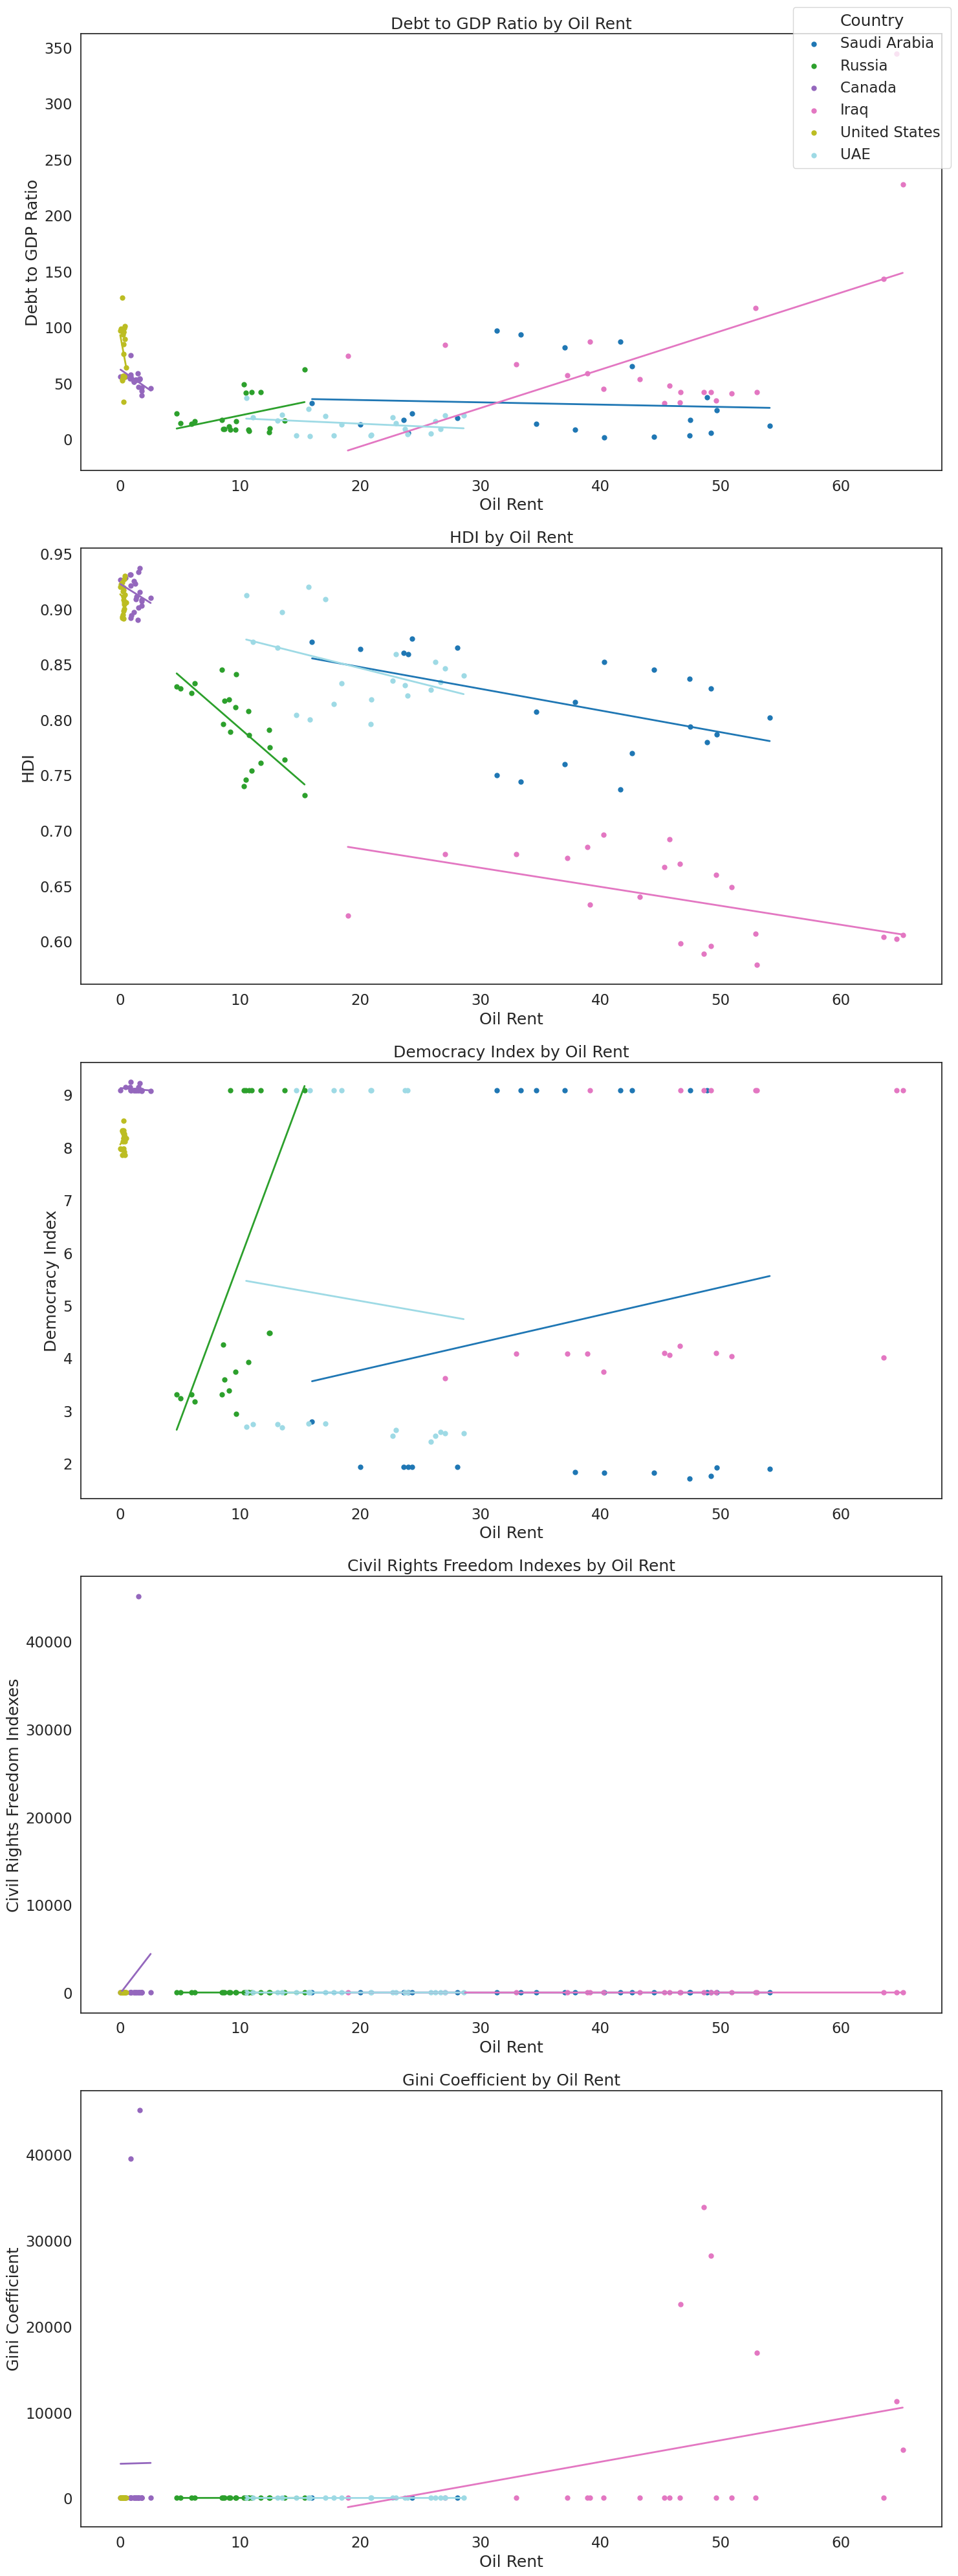

In [ ]:
from scipy import stats

# Reset the index to access 'Country' and 'Year' for plotting.
df_reset = df.reset_index()

# Define a colormap for the countries.
countries = df_reset['Country'].unique()
color_map = plt.cm.tab20(np.linspace(0, 1, len(countries)))

# Create subplots for each independent variable
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 40), sharex=False)
# Set up a regression function
def plot_country_regression(ax, x, y, country_color):
    m, b = np.polyfit(x, y, 1)
    ax.plot(np.sort(x), m*np.sort(x) + b, color=country_color, linewidth=2)

# Debt to GDP Ratio against Oil Rent for each country
for (color, country) in zip(color_map, countries):
    country_data = df_reset[df_reset['Country'] == country]
    axes[0].scatter(country_data['Oil_Rent'], country_data['Debt_to_GDP_Ratio'], color=color, label=country, s=25)
# Plot the regression line
    plot_country_regression(axes[0], country_data['Oil_Rent'], country_data['Debt_to_GDP_Ratio'], color)
axes[0].set_ylabel('Debt to GDP Ratio')
axes[0].set_xlabel('Oil Rent')
axes[0].set_title('Debt to GDP Ratio by Oil Rent')

# HDI
for (color, country) in zip(color_map, countries):
    country_data = df_reset[df_reset['Country'] == country]
    axes[1].scatter(country_data['Oil_Rent'], country_data['HDI'], color=color, label=country, s=25)
    plot_country_regression(axes[1], country_data['Oil_Rent'], country_data['HDI'], color)
axes[1].set_ylabel('HDI')
axes[1].set_xlabel('Oil Rent')
axes[1].set_title('HDI by Oil Rent')

# Democracy Index
for (color, country) in zip(color_map, countries):
    country_data = df_reset[df_reset['Country'] == country]
    axes[2].scatter(country_data['Oil_Rent'], country_data['Democracy_Index'], color=color, label=country, s=25)
    plot_country_regression(axes[2], country_data['Oil_Rent'], country_data['Democracy_Index'], color)
axes[2].set_ylabel('Democracy Index')
axes[2].set_xlabel('Oil Rent')
axes[2].set_title('Democracy Index by Oil Rent')

# Civil Rights Freedom Indexes
for (color, country) in zip(color_map, countries):
    country_data = df_reset[df_reset['Country'] == country]
    axes[3].scatter(country_data['Oil_Rent'], country_data['Civil_Rights_Freedom_Indexes'], color=color, label=country, s=25)
    plot_country_regression(axes[3], country_data['Oil_Rent'], country_data['Civil_Rights_Freedom_Indexes'], color)
axes[3].set_ylabel('Civil Rights Freedom Indexes')
axes[3].set_xlabel('Oil Rent')
axes[3].set_title('Civil Rights Freedom Indexes by Oil Rent')

# Gini Coefficient
for (color, country) in zip(color_map, countries):
    country_data = df_reset[df_reset['Country'] == country]
    axes[4].scatter(country_data['Oil_Rent'], country_data['Gini_Coefficient'], color=color, label=country, s=25)
    plot_country_regression(axes[4], country_data['Oil_Rent'], country_data['Gini_Coefficient'], color)
axes[4].set_ylabel('Gini Coefficient')
axes[4].set_xlabel('Oil Rent')
axes[4].set_title('Gini Coefficient by Oil Rent')


# Add a legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, title='Country')

plt.tight_layout()
plt.show()